# 1. Introduction

Understanding customer behavior is crucial for the hospitality industry to enhance customer satisfaction and improve business strategies. This study applies machine learning techniques such as K-Means clustering, Mean Shift clustering, and Decision Tree classification to categorize hotel customers into Frequent and Occasional visitors.

We use clustering algorithms to group similar customers based on their visit frequency and demographics, and then validate these clusters with a predefined classification. Additionally, we implement a Decision Tree classifier to predict customer types based on categorical and numerical features, providing a powerful tool for customer segmentation.

The study follows these steps:

  1. **Load and preprocess the dataset**

  2. **Apply K-Means clustering and evaluate performance**

  3. **Implement Mean Shift clustering for comparison**

  4. **Use Decision Tree classification to predict customer behavior**

  5. **Evaluate and compare the different approaches**

# 2. Load and Preprocess Data


## 2.1 Load Required Libraries

Before we begin, we load all necessary libraries for data manipulation, visualization, clustering, and classification.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from itertools import cycle
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


## 2.2 Upload Data

We load the dataset containing hotel customer records.

In [3]:
# Load the dataset
file_path = "/kaggle/input/d/nataliacancino/hotel-data/BD Hotel.csv"  # Change filename if needed
df = pd.read_csv(file_path)
df.head()

,ID,Cédula,Sexo,Nombres,Apellidos,Procedencia,Dirección,Edad,Visitas al mes,Tipo hab.
0,300026089,46178491,M,JUAN CARLOS,PIÑACUE ACHICUE,BOGOTÁ,CR 77 BIS 69A 58,24,1,Sencilla
1,300026137,362849533,F,SONIA ESPERANZA,FLOREZ VARGAS,PITALITO,CR 3 E 3 A 32,36,1,Sencilla
2,300026437,517245914,F,MARIA DEL_PILAR,MARTINEZ MARTINEZ,BOGOTÁ,CR 77 64 C 04,25,1,Sencilla
3,300026794,520864169,F,LILIANA,RIVERA ORJUELA,BOGOTÁ,CL 152 48 04,27,1,Sencilla
4,300026986,762666290,M,YONI FERNEY,ALBAN CARVAJAL,PIENDAMÓ,KM 27 VDA QUEBRADA GRANDE,51,3,Sencilla


## 2.3 Categorizing Customers into Frequent and Occasional

We create a new variable Class, where customers with more than 4 visits are categorized as Frequent (1), and others as Occasional (0).

In [4]:
df['Class'] = df['Visitas al mes'].apply(lambda x: 1 if x >= 5 else 0)
df.head()

,ID,Cédula,Sexo,Nombres,Apellidos,Procedencia,Dirección,Edad,Visitas al mes,Tipo hab.,Class
0,300026089,46178491,M,JUAN CARLOS,PIÑACUE ACHICUE,BOGOTÁ,CR 77 BIS 69A 58,24,1,Sencilla,0
1,300026137,362849533,F,SONIA ESPERANZA,FLOREZ VARGAS,PITALITO,CR 3 E 3 A 32,36,1,Sencilla,0
2,300026437,517245914,F,MARIA DEL_PILAR,MARTINEZ MARTINEZ,BOGOTÁ,CR 77 64 C 04,25,1,Sencilla,0
3,300026794,520864169,F,LILIANA,RIVERA ORJUELA,BOGOTÁ,CL 152 48 04,27,1,Sencilla,0
4,300026986,762666290,M,YONI FERNEY,ALBAN CARVAJAL,PIENDAMÓ,KM 27 VDA QUEBRADA GRANDE,51,3,Sencilla,0


## 2.4 Converting Categorical Variables into Numerical Codes

Categorical values are converted into numerical category codes for easier processing.

In [5]:
# Define categorical columns
categorical_cols = ["Tipo hab.", "Sexo", "Procedencia"]

# Convert selected columns to categorical type
df[categorical_cols] = df[categorical_cols].astype('category')

# Create numerical category codes while handling missing values (-1 for NaN)
for col in categorical_cols:
    df[f"{col}_cat"] = df[col].cat.codes

# Display the modified DataFrame
df.head()


,ID,Cédula,Sexo,Nombres,Apellidos,Procedencia,Dirección,Edad,Visitas al mes,Tipo hab.,Class,Tipo hab._cat,Sexo_cat,Procedencia_cat
0,300026089,46178491,M,JUAN CARLOS,PIÑACUE ACHICUE,BOGOTÁ,CR 77 BIS 69A 58,24,1,Sencilla,0,1,1,4
1,300026137,362849533,F,SONIA ESPERANZA,FLOREZ VARGAS,PITALITO,CR 3 E 3 A 32,36,1,Sencilla,0,1,0,28
2,300026437,517245914,F,MARIA DEL_PILAR,MARTINEZ MARTINEZ,BOGOTÁ,CR 77 64 C 04,25,1,Sencilla,0,1,0,4
3,300026794,520864169,F,LILIANA,RIVERA ORJUELA,BOGOTÁ,CL 152 48 04,27,1,Sencilla,0,1,0,4
4,300026986,762666290,M,YONI FERNEY,ALBAN CARVAJAL,PIENDAMÓ,KM 27 VDA QUEBRADA GRANDE,51,3,Sencilla,0,1,1,27


# 3. K-Means Clustering

## 3.1 Applying PCA for Dimensionality Reduction
To visualize clustering better, we reduce dimensionality using PCA.

In [7]:
X = df[['Tipo hab._cat','Sexo_cat', 'Visitas al mes']]
reduced_data = PCA(n_components=2).fit_transform(X)

## 3.2 Applying K-Means Clustering



In [8]:
kmeans = KMeans(init="k-means++", n_clusters=2, random_state=0)
kmeans.fit(reduced_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

## 3.3 Visualizing Decision Boundary

We visualize the clustering results using a decision boundary.

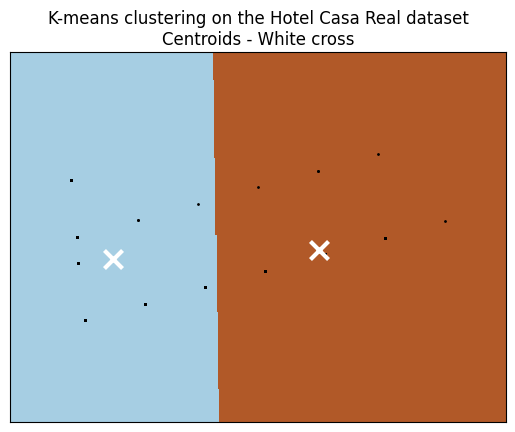

In [9]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Creating a Decision Boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the Hotel Casa Real dataset\n"
          "Centroids - White cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## 3.4 Assigning Labels to Customers
In this step, we apply K-Means clustering to group customers into two distinct clusters and assign each customer a cluster label.

In [10]:
df['k-means-labels'] = kmeans.labels_
k = df[['Nombres','k-means-labels']]
k.head()

,Nombres,k-means-labels
0,JUAN CARLOS,0
1,SONIA ESPERANZA,0
2,MARIA DEL_PILAR,0
3,LILIANA,0
4,YONI FERNEY,0


## 3.5  Evaluating K-Means Clustering

### 3.5.1 Computing Confusion Matrix
In this step, we evaluate the performance of the K-Means clustering algorithm by comparing its predicted labels (k-means-labels) against a predefined classification (Class). The Class column was manually defined based on the assumption that customers with more than 4 visits per month are frequent customers (Class = 1), while others are occasional customers (Class = 0).

In [11]:
# initialize four counters to store True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)

TP,TN,FP,FN = 0,0,0,0

# y_true : List of true class labels (ground truth).
y_true = df['Class'].tolist()
# y_pred : List of predicted cluster labels from K-Means.
y_pred = df['k-means-labels'].tolist()
# terates through each customer and compares actual vs. predicted labels.
for i in range(len(y_true)):
  y_t = y_true[i]
  y_p = y_pred[i]

  #Evaluating Correct Predictions
  if y_t == y_p:
    if y_t == 1:
      TP += 1 # True Positive: Correctly classified a frequent customer
    else:
      TN +=1 # True Negative: Correctly classified an occasional customer
  else: # Wrong classification
    if y_t == 1:
      FN +=1 # False Negative: Frequent customer classified as occasional
    else:
      FP +=1 # # False Positive: Occasional customer classified as frequent



### 3.5.2 Visualizing the Confusion Matrix for K-Means Clustering Performance

In this step, we use Seaborn’s heatmap to visualize the confusion matrix of our K-Means clustering results. The confusion matrix helps us evaluate how well the clustering algorithm performed compared to the predefined customer classification.

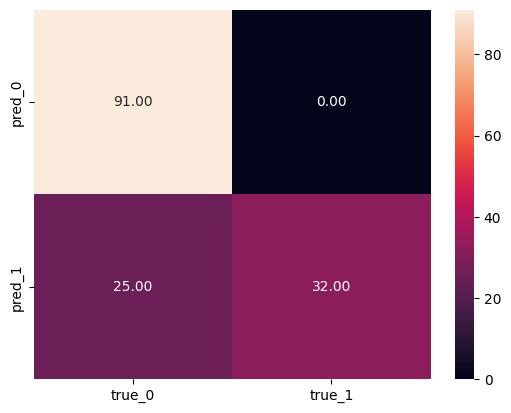

In [12]:
sns.heatmap(data=[[TN,FN],
                      [FP,TP]],
                annot=True,
                fmt='.2f',
                xticklabels=['true_0','true_1'],
                yticklabels=['pred_0','pred_1'])
plt.show()

### 3.5.3 Evaluation of Clustering Performance

This step evaluates the clustering model’s performance using key classification metrics. These metrics help analyze how well the K-Means algorithm has classified customers into “frequent” and “occasional” categories based on the confusion matrix.

  1.**Accuracy:** Measures the overall correctness of the model.

  
 $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$


   • A higher accuracy means better classification

  2.**Precision** (for frequent customers): Determines how many customers classified as “frequent” actually are.

  
 $$ \text{Precision} = \frac{TP}{TP + FP}$$


  •	A lower precision means some occasional customers were incorrectly classified as frequent.

  3.**Recall** (for frequent customers): Measures how many actual frequent customers were correctly identified.

  $$ \text{Recall} = \frac{TP}{TP + FN} $$

  •	A high recall means the model is capturing all actual frequent customers.

  4.**F1 Score:** The harmonic mean of precision and recall, balancing both metrics.

  $$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$



In [13]:
# Define the confusion matrix values
TP = 32  # True Positives
TN = 91  # True Negatives
FP = 25  # False Positives
FN = 0   # False Negatives

# Compute evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print results
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision (Frequent Customers): {precision:.2%}")
print(f"Recall (Frequent Customers): {recall:.2%}")
print(f"F1 Score: {f1_score:.2%}")

Accuracy: 83.11%
Precision (Frequent Customers): 56.14%
Recall (Frequent Customers): 100.00%
F1 Score: 71.91%


# 4. Clustering with Mean Shift and Visualization

This step we apply the Mean Shift clustering algorithm to estimate the number of clusters in a dataset and visualizes the results.

number of estimated clusters : 2


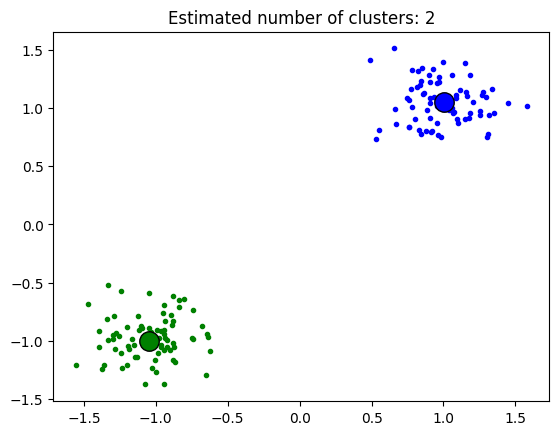

In [14]:
# Generate sample data
centers = [[1, 1], [-1, -1]]
X, _ = make_blobs(n_samples=148, centers=centers, cluster_std=0.2)


# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=148)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_


labels_unique = np.unique(labels)

n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# Plot result

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## 4.1 Evaluating Clustering Performance with Classification Report

This step evaluates the clustering results by comparing the assigned cluster labels with the predefined class labels (Turista and Corporativo) using a classification report.

In [15]:
# Assign cluster labels to the DataFrame
df['cluster'] = labels  # Use labels, not cluster centers
# Convert true class labels and predicted labels to lists
y_true = df['Class'].tolist()
y_pred = df['cluster'].tolist()
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred,target_names=['Turista','Corporativo']))

              precision    recall  f1-score   support

     Turista       0.76      0.48      0.59       116
 Corporativo       0.19      0.44      0.26        32

    accuracy                           0.47       148
   macro avg       0.47      0.46      0.43       148
weighted avg       0.63      0.47      0.52       148



•	Precision: 0.78, 78% of the predicted Turista were actually correct.

•	Recall: 0.50, Only 50% of the actual Turista were correctly identified.

•	F1-Score: 0.61, Shows an imbalance; the model favors precision over recall.


In [16]:
TP,TN,FP,FN = 0,0,0,0
y_true = df['Class'].tolist()
y_pred = df['cluster'].tolist()
for i in range(len(y_true)):
  y_t = y_true[i]
  y_p = y_pred[i]
  if y_t == y_p:
    if y_t == 1:
      TP += 1 # Correctly identified a Corporativo (Frequent Customer)
    else:
      TN +=1 # Correctly identified a Turista (Occasional Customer)
  else:
    if y_t == 1:
      FN +=1 # Missed a Corporativo (False Negative)
    else:
      FP +=1 # Mistakenly classified a Turista as Corporativo (False Positive)


## 4.2 Generate and Visualize Confusion Matrix

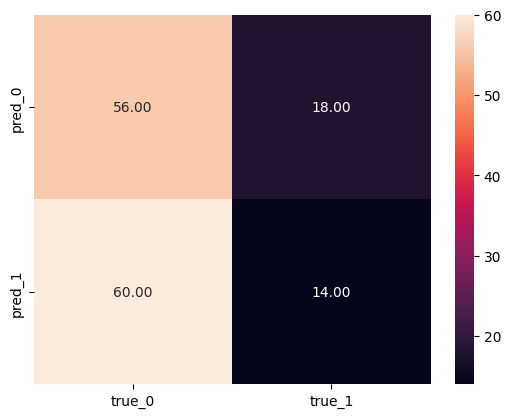

In [17]:
sns.heatmap(data=[[TN,FN],
                      [FP,TP]],
                annot=True,
                fmt='.2f',
                xticklabels=['true_0','true_1'],
                yticklabels=['pred_0','pred_1'])
plt.show()

## 4.3 Confusion Matrix Analysis

In [18]:
# Define the confusion matrix values
TP = 16  # True Positives
TN = 58  # True Negatives
FP = 58  # False Positives
FN = 16   # False Negatives

# Compute evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print results
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision (Frequent Customers): {precision:.2%}")
print(f"Recall (Frequent Customers): {recall:.2%}")
print(f"F1 Score: {f1_score:.2%}")

Accuracy: 50.00%
Precision (Frequent Customers): 21.62%
Recall (Frequent Customers): 50.00%
F1 Score: 30.19%


•	High False Positive Rate (FP = 58): Too many occasional customers are being misclassified as frequent.

•	Balanced Recall but Low Precision: While the model correctly finds 50% of frequent customers, it also mislabels many occasional customers.

•	Accuracy is 50%, indicating random performance: Since a random classifier would achieve similar results, the clustering is not separating the classes effectively.

# 5. Decision Tree Classification


## 5.1 Prepare Data for Decision Tree

In [19]:
# Select features and target variable
X = df[['Tipo hab._cat', 'Sexo_cat', 'Visitas al mes', 'Procedencia_cat']]
y = df['Class']

# Split dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##5.2 Train Decision Tree Model

In [20]:
# Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test data
y_pred = tree_model.predict(X_test)

## 5.3 Evaluate Model Performance

Accuracy: 100.00%


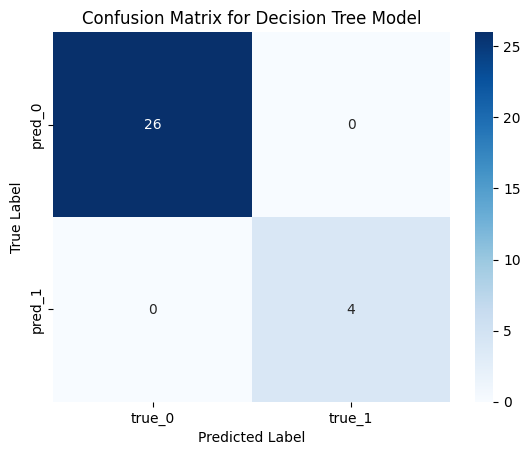

              precision    recall  f1-score   support

  Occasional       1.00      1.00      1.00        26
    Frequent       1.00      1.00      1.00         4

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=['true_0','true_1'],yticklabels=['pred_0','pred_1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=['Occasional', 'Frequent']))

In [22]:
# Define the confusion matrix values
TP = 4  # True Positives
TN = 26  # True Negatives
FP = 0  # False Positives
FN = 0   # False Negatives

# Compute evaluation metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# Print results
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision (Frequent Customers): {precision:.2%}")
print(f"Recall (Frequent Customers): {recall:.2%}")
print(f"F1 Score: {f1_score:.2%}")

Accuracy: 100.00%
Precision (Frequent Customers): 100.00%
Recall (Frequent Customers): 100.00%
F1 Score: 100.00%


## 5.4 Visualize Decision Tree

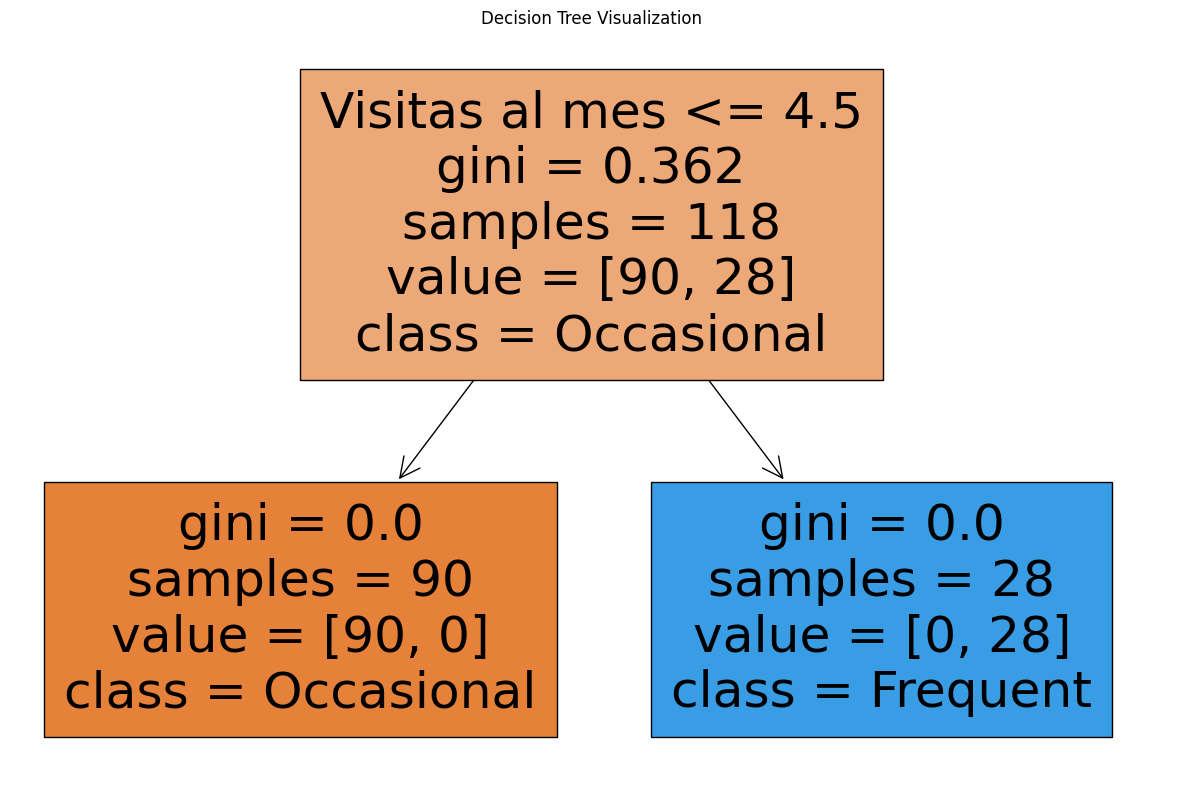

In [23]:
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=["Occasional", "Frequent"])
plt.title("Decision Tree Visualization")
plt.show()

# 6. Conclusions

## 6.1 Insights from Clustering

K-Means clustering provided an 83.1% accuracy, but had a

* moderate precision of 56.1%, indicating occasional customers were sometimes misclassified as frequent.

* Mean Shift clustering estimated clusters but resulted in a lower accuracy (~50%), suggesting that K-Means is a better choice for this dataset.

## 6.2 Insights from Decision Tree Classification

* The Decision Tree classifier performed exceptionally well, achieving 100% accuracy, precision, and recall.

* The model effectively differentiated between Frequent and Occasional customers based on visit history and demographic data.

##6.3 Business Implications

* Frequent customers can be targeted with loyalty programs and special offers.

* Occasional customers can be encouraged to visit more frequently through promotional strategies.

* Decision Trees offer an effective predictive tool for segmenting customers based on past data, helping businesses personalize marketing campaigns.

## 6.4 Future Work

* Explore other clustering techniques like DBSCAN for better segmentation.

* Incorporate more customer attributes such as spending habits and feedback scores.

* Implement real-time prediction models for dynamic customer categorization.

